**Physics 3700 Worksheet 6 - Windowing**

*This is the windowing worksheet. Because digital filters and signals are finite, what happens at the beginning and ends of a signal affect how things are processed. This week’s worksheet and lab will take a closer look at windowing. Windowing is necessary because we will never have an infinite signal, but windowing results in the degradation of the intended filter response. For example, the square pulse filter was presented as a low-pass filter, but we didn’t specify a frequency cutoff. Ideally the filter would pass low frequencies up to $f_c$ and not pass any frequencies higher. We’ll see (or you’ve already seen) that this does not happen. Frequencies higher than fc cannot be totally attenuated. The use of windows can help. The table below shows a few common filters and their properties.*

|Window Type| Window Function $\frac{N−1}{2} $| Number of Terms In <br> Window, $N$ | Filter Stop Band <br> Attenuation (dB)|
| :--- | :---: | :---: | :---: |
| Rectangular | 1 | 0.91$\frac{f_s}{T.W.}$ | 21|
| Hanning | 0.5 + 0.5 $cos\left(\frac{2\pi n}{N-1}\right)$ | $ 3.32\frac{f_s}{T.W.}$|44|
| Hamming | 0.54 + 0.46 $cos\left(\frac{2\pi n}{N-1}\right)$ | $ 3.44\frac{f_s}{T.W.}$|55
| Blackman | 0.5 + 0.5 $cos\left(\frac{2\pi n}{N-1}\right)$+0.08 cos$\left(\frac{4\pi n}{N-1}\right)$|$ 5.98\frac{f_s}{T.W.}$|75
| Kaiser | $ \frac{I_o\left(\beta \sqrt {1 - \left(\frac{2n}{N-1}\right)^2}\right)}{I_o(\beta)}$ | $ 4.33\frac{f_s}{T.W.}(\beta = 6)$| 64 |
| | | $ 5.25\frac{f_s}{T.W.}(\beta = 8)$| 81 |
| | | $ 6.36\frac{f_s}{T.W.}(\beta = 10)$| 100 |

*$f_s$ is the sampling frequency. T.W. is the transition width.*

$$I_o(x) = 1 + \sum_{j=1}^{\infty}\left[\frac{(x/2)^j}{j!}\right]$$

*The following bit of code calculates the frequency response of a square pulse filter. hn holds the weights of the elements in the filter. For the square pulse, all the elements have the same weight.*

    nsamp=100 # number of sampling in $\Omega$ space...faking a continuous function
    Homega=[0.]*nsamp # Frequency response
    ndow=7
    hn=[1.]*ndow #impulse response of the filter (7 term square pulse)
    ii=0 ## Counter for building the frequency response
    while ii<nsamp:
        i=0
        omega=ii*np.pi/nsamp ## converting counter to a digital frequency (zero to pi)
        while i<ndow:
            Homega[ii]+=hn[i]*cmath.exp(complex(0, -(i*omega))) #building H at an Omega
            i+=1 
        ii+=1
    plt.plot(np.abs(Homega))
    plt.show()
    
*1. Using the above template, plot the frequency response for an $N$ = 35 Hanning, Hamming and Blackman window.
There is no 2.*


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
import time

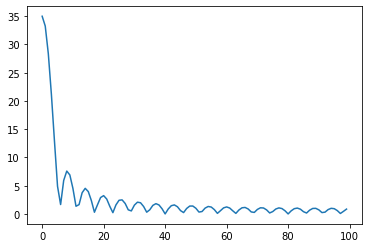

In [2]:
# Frequency response to a square wave filter

nsamp=100         # number of sampling in $\Omega$ space...faking a continuous function
Homega=[0.]*nsamp # Frequency response
ndow=35

hn=[1.]*ndow      #impulse response of the filter (7 term square pulse)
ii=0              ## Counter for building the frequency response
while ii<nsamp:
    i=0
    omega=ii*np.pi/nsamp ## converting counter to a digital frequency (zero to pi)
    while i<ndow:
        Homega[ii]+=hn[i]*cmath.exp(complex(0, -(i*omega))) #building H at an Omega
        i+=1 
    ii+=1
plt.plot(np.abs(Homega))
plt.show()

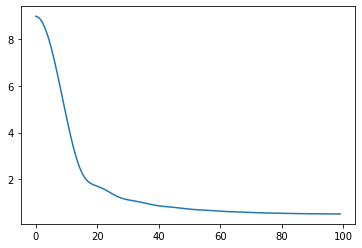

In [45]:
# Frequency response to a Hanning window filter

i=int(-(ndow-1)/2)
hn_hanning = [0.]*nsamp
while i <= ((ndow-1)/2):
    hn_hanning[i] = 0.5+0.5*np.cos(2*np.pi*i/(ndow-1))
    i+=1
    
Homega_han=[0.]*nsamp # Frequency response of hanning window function

ii=0              ## Counter for building the frequency response
while ii<nsamp:
    i=0
    omega=ii*np.pi/nsamp ## converting counter to a digital frequency (zero to pi)
    while i<ndow:
        Homega_han[ii]+=hn_hanning[i]*cmath.exp(complex(0, -(i*omega))) #building H at an Omega
        i+=1 
    ii+=1
plt.plot(np.abs(Homega_han))
plt.show()

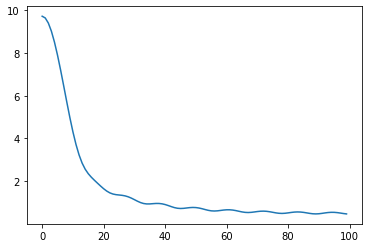

In [44]:
# Frequency response to a Hamming window filter

i=int(-(ndow-1)/2)
hn_hamming = [0.]*nsamp
while i <= ((ndow-1)/2):
    hn_hamming[i] = 0.54+0.46*np.cos(2*np.pi*i/(ndow-1))
    i+=1
    
Homega_ham=[0.]*nsamp # Frequency response of Hamming window function

ii=0              ## Counter for building the frequency response
while ii<nsamp:
    i=0
    omega=ii*np.pi/nsamp ## converting counter to a digital frequency (zero to pi)
    while i<ndow:
        Homega_ham[ii]+=hn_hamming[i]*cmath.exp(complex(0, -(i*omega))) #building H at an Omega
        i+=1 
    ii+=1
plt.plot(np.abs(Homega_ham))
plt.show()

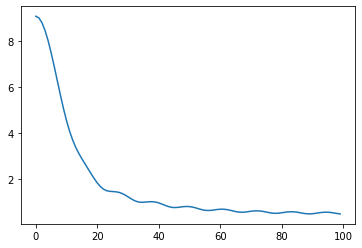

In [46]:
# Frequency to a Blackman window filter

i=int(-(ndow-1)/2)
hn_black = [0.]*nsamp
while i <= ((ndow-1)/2):
    hn_black[i] = 0.5+0.5*np.cos(2*np.pi*i/(ndow-1))+0.08*np.cos(4*np.pi*i/(ndow-1))
    i+=1
    
Homega_black=[0.]*nsamp # Frequency response for a Blackman window function

ii=0              ## Counter for building the frequency response
while ii<nsamp:
    i=0
    omega=ii*np.pi/nsamp ## converting counter to a digital frequency (zero to pi)
    while i<ndow:
        Homega_black[ii]+=hn_black[i]*cmath.exp(complex(0, -(i*omega))) #building H at an Omega
        i+=1 
    ii+=1
plt.plot(np.abs(Homega_black))
plt.show()